### Required Try-It Activity 14.1: Grid Searching Decision Trees 

This try-it focuses on performing a grid search with a `DecisionTreeClassifier`.  As mentioned in the lectures, the grid search for a tree model can get large very easily. In addition to using `GridSearchCV`, scikitlearn implements additional tools that can save energy and offer alternatives to the brute force exhaustive search.  Below, you will compare the performance of some of these alternatives and discuss the time these searches take.  Note that this will be in large part determined by your personal computing power however the relative speed of the searches should be consistent.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV

In [15]:
params = {'max_depth': [],
         'min_samples_split': [],
          'criterion': [],
          'min_samples_leaf': []
         }

In [16]:
dtree = DecisionTreeClassifier()

### Comparing Grid Searches

Below, explore the four grid search options using the same parameter selections for the `DecisionTreeClassifier`. All of the grid searching tools have a `.cv_results_` attribute after fitting that contains information after fitting including time.  Use this to compare the time of each search and discuss what you believe the "best" approach to identifying the hyperparameters of the model are between:

- `GridSearchCV`
- `RandomizedSearchCV`
- `HalvingGridSearchCV`
- `HalvingRandomSearchCV`

Share your results in a plot comparing the different times for searching across the different parameters as well as the score of the different estimators that resulted from the grid search.  

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from category_encoders import JamesSteinEncoder

from sklearn.preprocessing import LabelEncoder 
import time 

#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("miadul/credit-card-fraud-detection-dataset")

#print("Path to dataset files:", path)

df = pd.read_csv("credit_card_fraud_10k.csv")

encoder = LabelEncoder()
df['merchant_category'] = encoder.fit_transform(df['merchant_category'])

X = df.drop(['transaction_id', 'is_fraud'], axis=1)
y= df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head()




,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,1,0,0,66,3,40,0
1,2,541.82,3,4,1,0,87,1,64,0
2,3,237.01,17,3,0,0,49,1,61,0
3,4,164.33,4,3,0,1,72,3,34,0
4,5,30.53,15,2,0,0,79,0,44,0


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)


Accuracy: 0.99
Precision: 0.8666666666666667
Recall: 0.41935483870967744
F1 Score: 0.5652173913043478
ROC AUC: 0.7091695473385868


array([[1967,    2],
       [  18,   13]])

In [28]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 2, 5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [29]:
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')
halving_grid_search = HalvingGridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy', random_state=42)

random_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=42)
halving_random_search = HalvingRandomSearchCV(estimator=dtree, param_distributions=param_grid, cv=5, scoring='accuracy', random_state=42)

In [30]:
start_time_gs = time.time()
grid_search.fit(X_train, y_train)
end_time_gs = time.time()

start_time_hgs = time.time()
halving_grid_search.fit(X_train, y_train)
end_time_hgs = time.time()

start_time_rs = time.time()
random_search.fit(X_train, y_train)
end_time_rs = time.time()

start_time_hrs = time.time()
halving_random_search.fit(X_train, y_train)
end_time_hrs = time.time()


results = {
    'GridSearchCV': {
        'Best Score': grid_search.best_score_,
        'Best Params': grid_search.best_params_,
        'Time Taken': end_time_gs - start_time_gs
    },
    'HalvingGridSearchCV': {
        'Best Score': halving_grid_search.best_score_,
        'Best Params': halving_grid_search.best_params_,
        'Time Taken': end_time_hgs - start_time_hgs
    },
    'RandomizedSearchCV': {
        'Best Score': random_search.best_score_,
        'Best Params': random_search.best_params_,
        'Time Taken': end_time_rs - start_time_rs
    },
    'HalvingRandomSearchCV': {
        'Best Score': halving_random_search.best_score_,
        'Best Params': halving_random_search.best_params_,
        'Time Taken': end_time_hrs - start_time_hrs
    }
}



C:\Users\prove\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 108 is smaller than n_iter=400. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [31]:
df_results = pd.DataFrame.from_dict(results, orient='index')
pd.set_option('display.max_colwidth', None)
df_results

,Best Score,Best Params,Time Taken
GridSearchCV,0.999125,"{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}",3.099666
HalvingGridSearchCV,0.993069,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}",1.370066
RandomizedSearchCV,0.999125,"{'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}",2.810387
HalvingRandomSearchCV,0.984568,"{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'entropy'}",1.294698


In [32]:
methods = ['GridSearchCV', 'HalvingGridSearchCV', 'RandomizedSearchCV', 'HalvingRandomSearchCV']
times = [results[method]['Time Taken'] for method in methods]
scores = [results[method]['Best Score'] for method in methods]


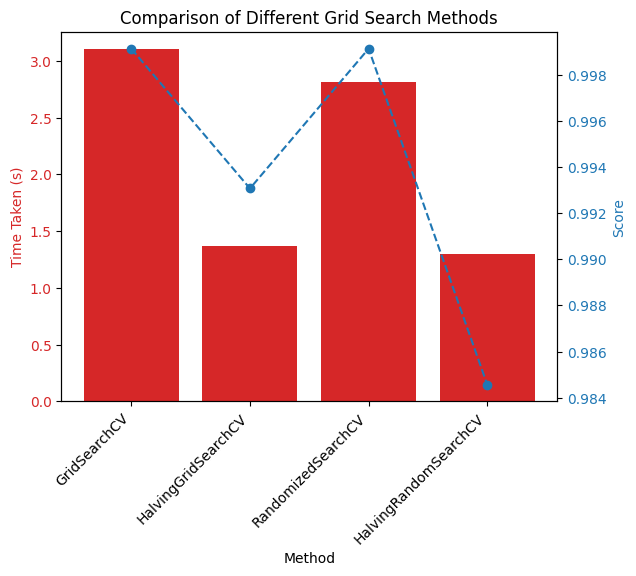

In [33]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Method')
ax1.set_ylabel('Time Taken (s)', color=color)
ax1.bar(methods, times, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods, rotation=45, ha='right')

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Score', color=color)
ax2.plot(methods, scores, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparison of Different Grid Search Methods')
plt.show()